In [32]:
# Import libraries
import numpy as np
import pandas as pd
# Upload the dataset
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
# Drop the index
diamonds = diamonds.drop(['Unnamed: 0'], axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
# Print unique values of text features
print(diamonds.cut.unique())
print(diamonds.clarity.unique())
print(diamonds.color.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [35]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()
# Convert the variables to numerical
for i in range(3):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [36]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
# Create features and target matrixes
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]
# Scale data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [37]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Create lasso and ridge objects
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
# Fit the models
lasso.fit(X, y)
ridge.fit(X, y)
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X, y))
print("ridge score:",ridge.score(X, y))
print("lasso MSE:", mean_squared_error(y, lasso.predict(X)))
print("ridge MSE:", mean_squared_error(y, ridge.predict(X)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.8850606039595762
ridge score: 0.8850713120355513
lasso MSE: 1829298.9194159873
ridge MSE: 1829128.4968064611
lasso coef: [ 5159.45245224  -217.84225841  -207.20956411 -1250.0126333
    16.16031486    -0.           496.17780105    72.11296318
  -451.28351376]
ridge coef: [[ 5.20114712e+03 -2.20844296e+02 -2.08496831e+02 -1.32579812e+03
   5.36297456e+01 -1.67310953e+00  4.96434236e+02  7.26648505e+01
  -4.53187286e+02]]


In [38]:
# Make necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')

# Fit models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train)
gridridge.fit(X_train, y_train)
linear.fit(X_train, y_train)
print("ridge best parameters:", gridridge.best_params_)
print("lasso best parameters:", gridlasso.best_params_)
print("ridge score:", gridridge.score(X_test, y_test))
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

ridge best parameters: {'alpha': 24.0}
lasso best parameters: {'alpha': 1.8000000000000003}
ridge score: 0.8859432689353808
lasso score: 0.8864028207282029
linear score: 0.8859249267960946
ridge MSE: 1812127.070909156
lasso MSE: 1804825.737296624
linear MSE: 1812418.4898094584
ridge best estimator coef: [[ 5077.4918518   -196.88661067  -208.02757232 -1267.11393653
    208.75255168   -91.36220706   502.04325405    74.65191115
   -457.7374841 ]]
lasso best estimator coef: [ 5081.13719385  -206.74219417  -206.76740591 -1189.71741405
    34.20443271    -0.           501.07193561    73.6968175
  -456.5137409 ]
linear coef: [[ 5155.92874335  -208.70209498  -208.16287626 -1439.0942139
    243.82503796   -28.79983655   501.31962765    73.93030707
   -459.94636759]]


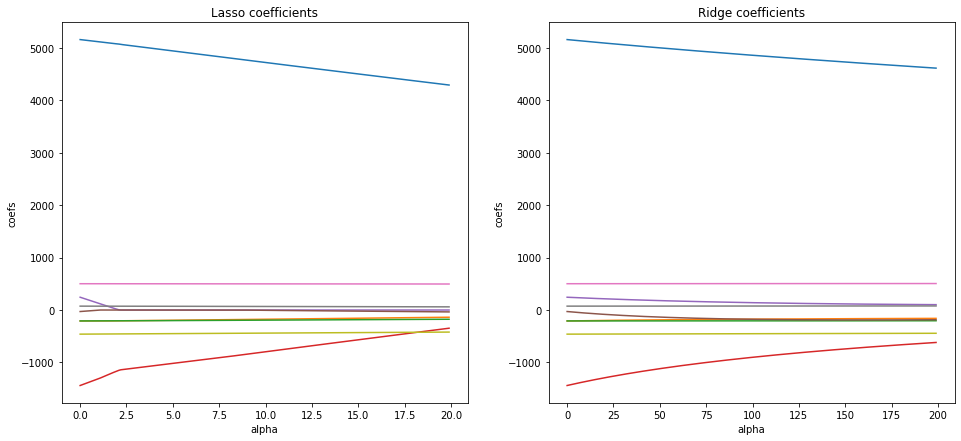

In [39]:
# Import library for visualization
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1)
alphasRidge = np.arange (0, 200, 1)
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_)
    ridge = linear_model.Ridge(alpha=alphasRidge[i])
    ridge.fit(X_train, y_train)
    coefsRidge.append(ridge.coef_[0])

    
# Build Lasso and Ridge coefficient plots (To show that coefficients are close to zero as alpha increase)
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.subplot(122)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()